# Homework 5: An External Forcing Experiment

Name: Alex Akin

Date: 9/27/25

#### Overview
In class, we set up the MITgcm `global_ocean_ebm` configuration with the `exf` package to run on MITgcm. In this assignment, we will assess the output of this model configuration. 

To begin, import the Python modules for manging and plotting data, and making movies. Then, define a path to your homework 5 directory. Finally, the `diags` folder on Spartan to your local machine.

In [1]:
# import pertinent modules

import numpy as np
import os
import matplotlib.pyplot as plt
import moviepy.video.io.ImageSequenceClip

# define a path to the diags directory
diags_dir = '/Users/alex/Desktop/MS274/diags'

### Part 1: Choose Variables to Examine 
In this assignment, you'll investigate the relationship between a state variable (temperature, salinity, or velocity) and an associated forcing variable (heat flux, freshwater flux, or wind stress). 

In the markdown cell below, indicate which pair of variables you're going to investigate.

I'll investigate temperature and heat flux.

### Part 2: Make a Movie
Next, make a movie for your variables of interest. The movie should show your state variable in one panel and your forcing variable in another panel. If you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

In [2]:
def plot_frame(theta_field, qnet_field, image_path):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))

    im0 = axes[0].pcolormesh(theta_field, cmap='RdBu_r')
    plt.colorbar(im0, ax=axes[0], label='THETA')
    axes[0].set_title('SST (THETA)')

    im1 = axes[1].pcolormesh(qnet_field, cmap='coolwarm')
    plt.colorbar(im1, ax=axes[1], label='EXFqnet')
    axes[1].set_title('Surface Heat Flux')

    plt.tight_layout()
    plt.savefig(image_path)
    plt.close(fig)

diags_dir = '/Users/alex/Desktop/MS274/diags'
nlat, nlon = 40, 90
fps = 5

file_list = []

for it in range(10, 7290+1, 20):
    theta_path = os.path.join(diags_dir, "diagSurf", f"diagSurf.{it:010d}.data")
    qnet_path  = os.path.join(diags_dir, "diagsEXF", f"diagsEXF.{it:010d}.data")
    image_path = os.path.join("images", f"frame.{it:010d}.png")
    os.makedirs(os.path.dirname(image_path), exist_ok=True)

    theta = np.fromfile(theta_path, '>f4').reshape((2,1,nlat,nlon))[0,0,:,:]  # THETA
    qnet  = np.fromfile(qnet_path,  '>f4').reshape((4,1,nlat,nlon))[2,0,:,:]  # EXFqnet

    plot_frame(theta, qnet, image_path)
    file_list.append(image_path)

# make the movie
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(file_list, fps=fps)
clip.write_videofile("THETA_EXFqnet.mp4")

Moviepy - Building video THETA_EXFqnet.mp4.
Moviepy - Writing video THETA_EXFqnet.mp4



Moviepy - Done !
Moviepy - video ready THETA_EXFqnet.mp4


Comment on any features you observe in your movie. Place particular focus on the potential connection(s) between your state variable and the forcing.

I notice that high SSTs seem to be oscillating around the equator, corresponding to the tilt of the Earth throughout the year (i.e., the location of the sun overhead). I expect that the prescribed external forcing (qnet) will drive SST variability.

### Part 3: Plot Time Series at a Location
Based on your movie, choose an interesting place in your model domain and create a timeseries of your variables at this location. There should be two plots - either as two horizontal subplots (one for each variable), or one plot with two separate y-axes for the different variables.

Again you are using velocity and wind stress, you can either plot the magnitude of these variables or plot the vector components individually.

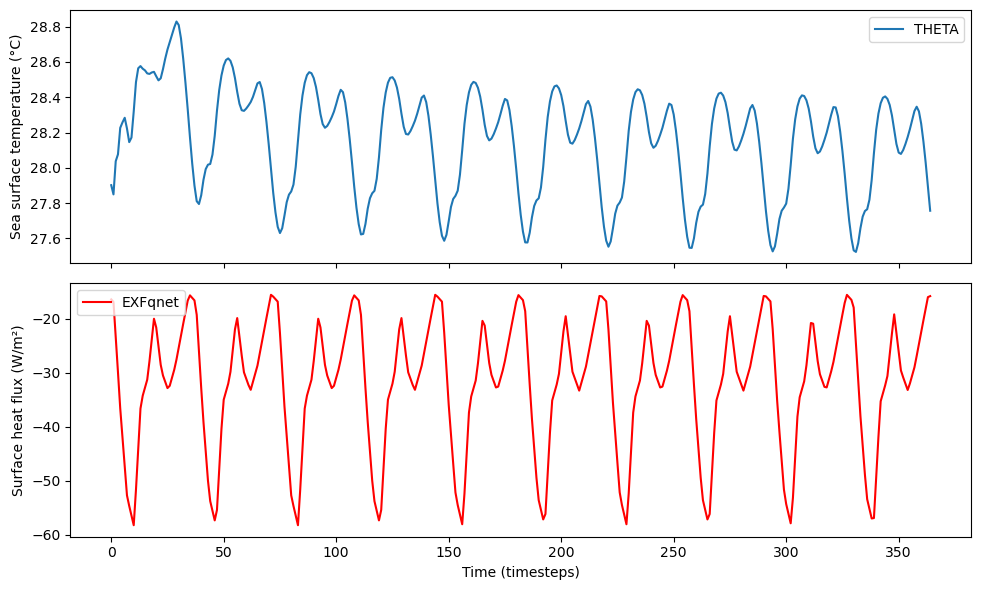

In [3]:
# pick grid pt
row, col = 20, 45

# initialize arrays
theta_timeseries = np.zeros((365,))
qnet_timeseries  = np.zeros((365,))

for i, it in enumerate(range(10, 7290+1, 20)):
    
    # file paths
    theta_path = os.path.join(diags_dir, "diagSurf", f"diagSurf.{it:010d}.data")
    qnet_path  = os.path.join(diags_dir, "diagsEXF", f"diagsEXF.{it:010d}.data")

    # read fields
    theta = np.fromfile(theta_path, '>f4').reshape((2,1,40,90))[0,0,:,:]  # THETA
    qnet  = np.fromfile(qnet_path,  '>f4').reshape((4,1,40,90))[2,0,:,:]  # EXFqnet

    # sample at location
    theta_timeseries[i] = theta[row, col]
    qnet_timeseries[i]  = qnet[row, col]

# plot time series with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

axes[0].plot(theta_timeseries, label="THETA")
axes[0].set_ylabel("Sea surface temperature (°C)")
axes[0].legend()

axes[1].plot(qnet_timeseries, label="EXFqnet", color='r')
axes[1].set_ylabel("Surface heat flux (W/m²)")
axes[1].set_xlabel("Time (timesteps)")
axes[1].legend()

plt.tight_layout()
plt.show()

Comment on any features you observe in your timeseries. Place particular focus on the potential connection(s) between your state variable and the forcing. Is there anything you observe in your timeseries that you didn't catch by eye in your movie?

Generally, the SST and surface heat flux seem to be related seasonally: higher SSTs correspond roughly (with some lag) to less negative surface heat fluxes. There are also two peaks per year of SST and QNET, which can be explained by my choice of a location at the equator (in the central Pacific Ocean), where the sun passes overhead at the spring and fall equinoxes (resulting in incoming shortwave radiation peaking at those times of year).